In [10]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import itertools
import random

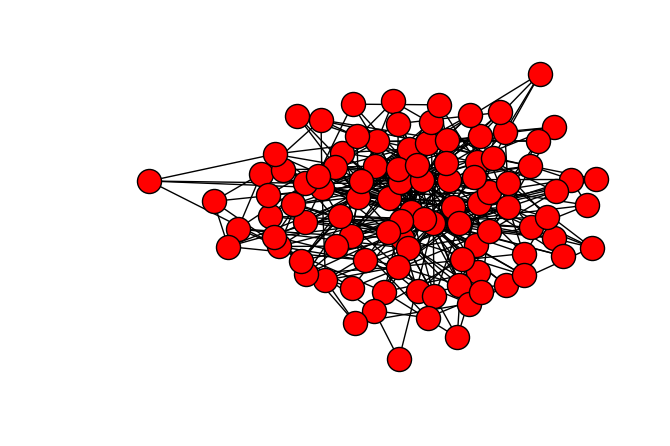

In [11]:
G = nx.barabasi_albert_graph(100, 4)

nx.draw(G)

In [12]:
def degree_histogram(G, plot_type='bar', **kwargs):
    degree_count = Counter(G.degree().values())
    degrees = list(degree_count.keys())
    counts = list(degree_count.values())
    
    if plot_type == 'bar':
        plt.bar(degrees, counts, align='center', **kwargs)
    else:
        plt.scatter(degrees, counts, **kwargs)

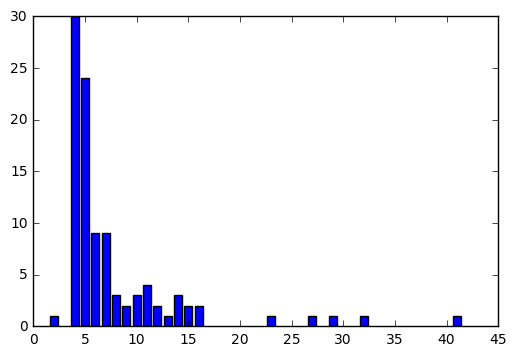

In [13]:
degree_histogram(G)

In [14]:
#takes a graph G_old and recreates a new random graph G_new with same number of nodes & edges
def total_randomization(G_old):
    G_new = nx.Graph()
    
    #getting nodes from G_old to get same number of nodes in G_new
    G_new.add_nodes_from(G_old.nodes_iter())
    
    #list of all possible edges. must import itertools
    possible_edges = list(itertools.combinations(G_new.nodes(), 2))
    number_of_edges = G_old.number_of_edges()
    new_edges = random.sample(possible_edges, number_of_edges)
    
    #adding same number of edges to G_new
    G_new.add_edges_from(new_edges)
    
    return G_new

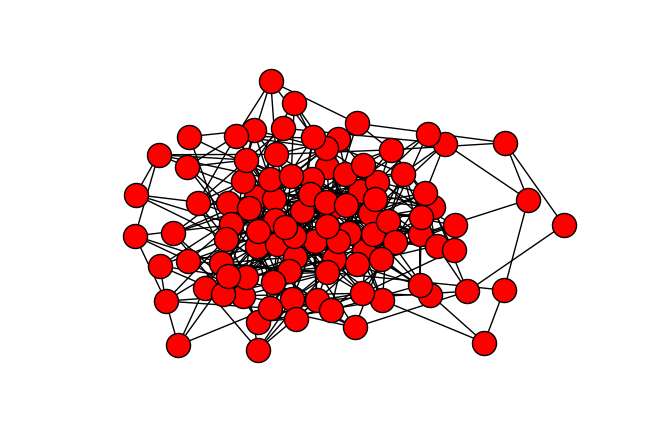

In [15]:
G2 = total_randomization(G)
nx.draw(G2)

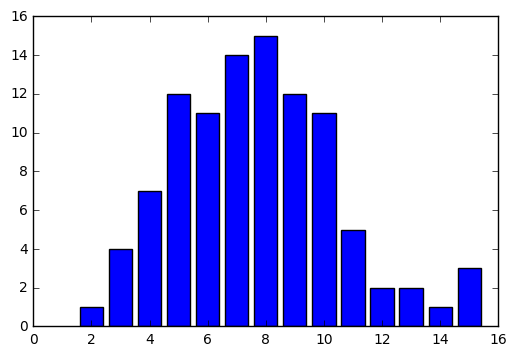

In [16]:
degree_histogram(G2)

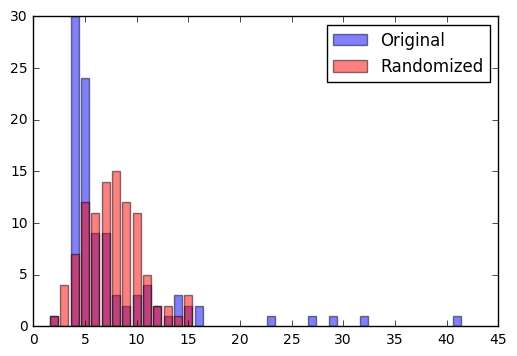

In [17]:
degree_histogram(G, alpha=0.5, color='blue', label="Original")
degree_histogram(G2, alpha=0.5, color='red', label="Randomized")

plt.legend()

# Degree-preserving randomization

In [18]:
def degree_preserving_randomization(G_old):
    G_new = G_old.copy()
    
    Q = 16
    num_iterations = Q * G_new.number_of_edges()
    
    for _ in range(num_iterations):
        old_edge_pair = random.sample(G_new.edges(), 2)
        
        #tuple unpacking
        (a, b), (u, v) = old_edge_pair
        
        if random.choice([True, False]):
            new_edge_pair = (a, u), (b, v)
        else:
            new_edge_pair = (a, v), (b, u)
        
        #returns True/False if any of the pairs are from a node to the same node (selfloop)
        has_self_loops = any(s == t for s, t in new_edge_pair)
        
        has_new_edges = any(G_new.has_edge(*edge)for edge in new_edge_pair)
            
        if not has_self_loops and not has_new_edges:
            G_new.remove_edges_from(old_edge_pair)
            G_new.add_edges_from(new_edge_pair)
    
    return G_new

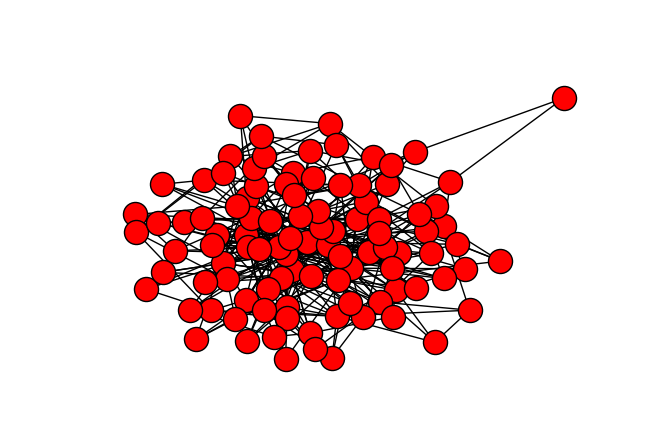

In [19]:
G2 = degree_preserving_randomization(G)
nx.draw(G2)

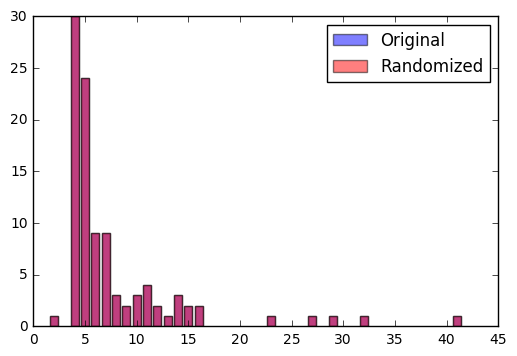

In [20]:
degree_histogram(G, alpha=0.5, color='blue', label="Original")
degree_histogram(G2, alpha=0.5, color='red', label="Randomized")

plt.legend()

# Fitting powerlaws

[]

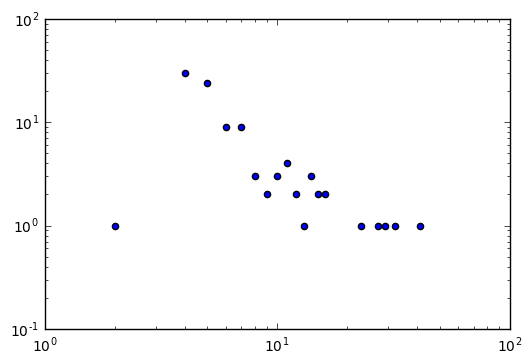

In [21]:
degree_histogram(G, "scatter")
plt.loglog()

[]

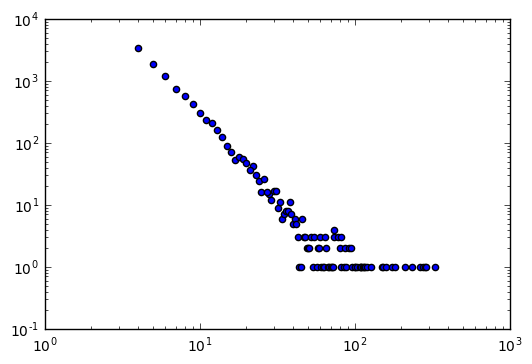

In [22]:
G = nx.barabasi_albert_graph(10000, 4)
degree_histogram(G, 'scatter')
plt.loglog()

In [23]:
#power law formula
#y = a * x**b
#log (y) = log(a * x**b)
#log (y) = log(a) + log(x**b)
#log (y) = log(a) + b * log(x)

#y' = a' + bx'

In [24]:
degrees = G.degree().values()
counts = list(Counter(degrees).items())
counts[:5]

[(4, 3347), (5, 1893), (262, 1), (7, 747), (8, 569)]

In [25]:
# .T transposes data to return list of lists, first being x values, second being y values
data = np.array(counts).T
data

array([[   4,    5,  262,    7,    8,    9,   10,   11,   12,   13,   14,
          15,   16,   17,   18,   19,   20,  277,   22,   23,   24,   25,
          26,  283,   28,   29,   30,   31,   32,  289,   34,   35,   36,
          37,   38,   39,   40,   41,   42,   43,   44,   45,   46,   47,
          48,   49,   50,   51,   52,   54,   55,   57,   58,   59,   60,
          61,   62,   63,   64,   65,   67,   68,   70,   71,   72,   73,
          74,  331,   78,   80,   81,   82,   85,   86,   88,   92,   95,
          96,  100,  101,  103,  108,  109,  110,  113,  114,  117,  120,
          21,  150,  152,  160,   27,  174,  182,    6,   33,  210,  235,
         127],
       [3347, 1893,    1,  747,  569,  418,  305,  231,  210,  164,  125,
          89,   72,   53,   60,   54,   47,    1,   42,   30,   24,   16,
          26,    1,   15,   12,   17,   17,    9,    1,    6,    7,    8,
           8,   11,    7,    5,    6,    5,    3,    1,    1,    6,    3,
           3,    2,    

In [26]:
#change data to log log scale
log_data = np.log(data)
log_data

array([[ 1.38629436,  1.60943791,  5.5683445 ,  1.94591015,  2.07944154,
         2.19722458,  2.30258509,  2.39789527,  2.48490665,  2.56494936,
         2.63905733,  2.7080502 ,  2.77258872,  2.83321334,  2.89037176,
         2.94443898,  2.99573227,  5.62401751,  3.09104245,  3.13549422,
         3.17805383,  3.21887582,  3.25809654,  5.6454469 ,  3.33220451,
         3.36729583,  3.40119738,  3.4339872 ,  3.4657359 ,  5.66642669,
         3.52636052,  3.55534806,  3.58351894,  3.61091791,  3.63758616,
         3.66356165,  3.68887945,  3.71357207,  3.73766962,  3.76120012,
         3.78418963,  3.80666249,  3.8286414 ,  3.8501476 ,  3.87120101,
         3.8918203 ,  3.91202301,  3.93182563,  3.95124372,  3.98898405,
         4.00733319,  4.04305127,  4.06044301,  4.07753744,  4.09434456,
         4.11087386,  4.12713439,  4.14313473,  4.15888308,  4.17438727,
         4.20469262,  4.21950771,  4.24849524,  4.26267988,  4.27666612,
         4.29045944,  4.30406509,  5.80211838,  4.3

In [27]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(log_data)

(slope, intercept, r_value, p_value, std_err)

(-2.0068590681869343,
 9.5259837314754154,
 -0.91807583603126752,
 3.6236513094379393e-41,
 0.087531460851945922)

In [28]:
def powerlaw(x, amplitude, index):
    #same as y = a * x**b
    # a is amplitude, b is index
    return amplitude * x**index

X = data[0]
Y_fit = powerlaw(X,
                 amplitude= np.exp(intercept),
                 index = slope,
                )
Y_fit

array([  8.48853251e+02,   5.42435217e+02,   1.92261485e-01,
         2.76114685e+02,   2.11206772e+02,   1.66744661e+02,
         1.34965604e+02,   1.11468926e+02,   9.36089771e+01,
         7.97177167e+01,   6.87012640e+01,   5.98181202e+01,
         5.25512515e+01,   4.65312365e+01,   4.14884452e+01,
         3.72223604e+01,   3.35813634e+01,   1.71937060e-01,
         2.77350555e+01,   2.53680049e+01,   2.32912460e+01,
         2.14592029e+01,   1.98349027e+01,   1.64699518e-01,
         1.70938525e+01,   1.59314566e+01,   1.48835998e+01,
         1.39357206e+01,   1.30754994e+01,   1.57909049e-01,
         1.15776340e+01,   1.09233340e+01,   1.03229157e+01,
         9.77062440e+00,   9.26145312e+00,   8.79102944e+00,
         8.35552125e+00,   7.95155855e+00,   7.57616825e+00,
         7.22671931e+00,   6.90087661e+00,   6.59656193e+00,
         6.31192074e+00,   6.04529391e+00,   5.79519356e+00,
         5.56028227e+00,   5.33935515e+00,   5.13132446e+00,
         4.93520615e+00,

[]

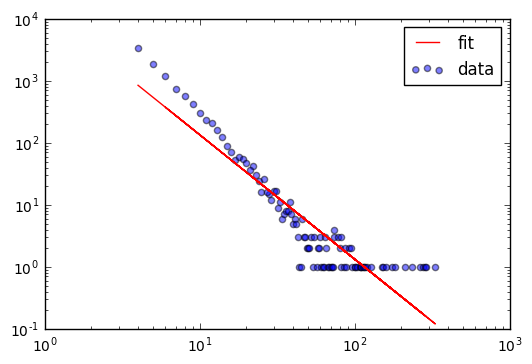

In [29]:
degree_histogram(G, 'scatter', alpha=0.5, label='data')
plt.plot(X, Y_fit, color='red', label='fit')

plt.legend()
plt.loglog()

[]

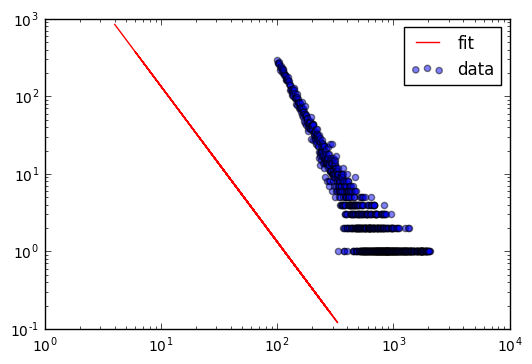

In [30]:
Q = nx.barabasi_albert_graph(15000, 100)


degree_histogram(Q, 'scatter', alpha=0.5, label='data')
plt.plot(X, Y_fit, color='red', label='fit')

plt.legend()
plt.loglog()